In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the CSV data for static TL
df_static = pd.read_csv("additionals/static_vehicle_data/processed_static_vehicle_data_results/all_static_vehicle_data.csv")

# Remove trailing spaces in column names
df_static.columns = df_static.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_peak_static = df_static[(df_static['interval_begin'] >= 900) & (df_static['interval_end'] <= 3600)]

In [4]:
# Group by detector and time, average across seeds static
df_grouped_static = df_peak_static.groupby(['interval_id', 'interval_begin'])[['interval_meanTimeLoss', 'interval_meanOccupancy']].mean().reset_index()

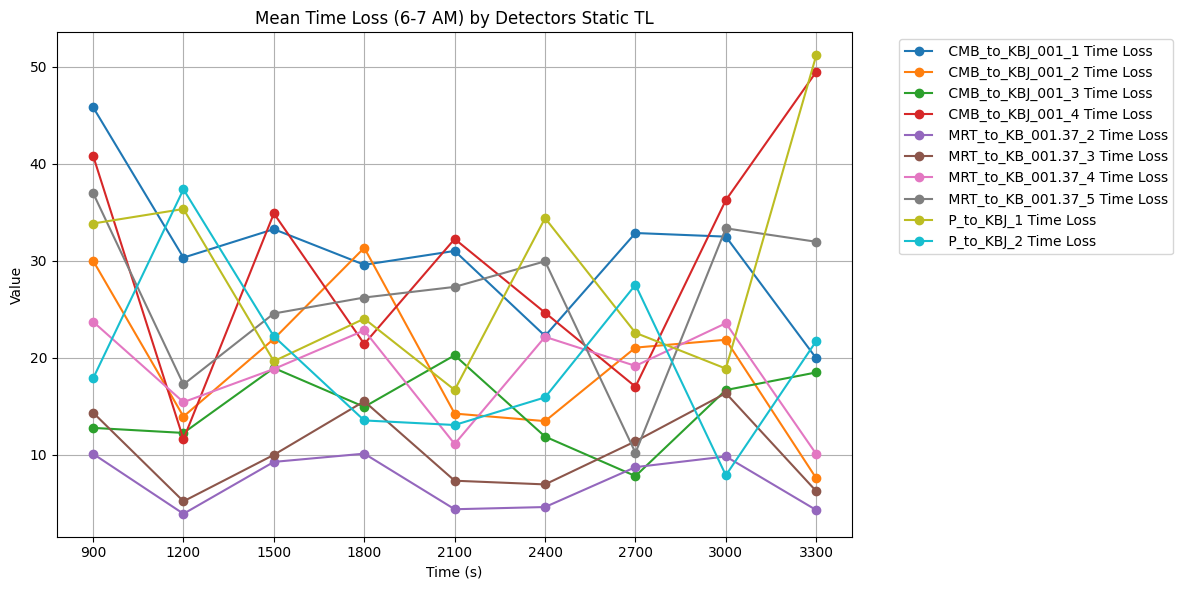

In [5]:
# Plot Mean Time Loss (6-7 AM) by Detectors Static TL
plt.figure(figsize=(12, 6))
for detector in df_grouped_static['interval_id'].unique():
    subset = df_grouped_static[df_grouped_static['interval_id'] == detector]
    plt.plot(subset['interval_begin'], subset['interval_meanTimeLoss'], marker='o', label=f"{detector} Time Loss")
    ##plt.plot(subset['interval_begin'], subset[' interval_meanOccupancy'], marker='s', label=f"{detector} Occupancy")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Mean Time Loss (6-7 AM) by Detectors Static TL")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(df_grouped_static['interval_begin'].unique())
plt.tight_layout()
plt.show()

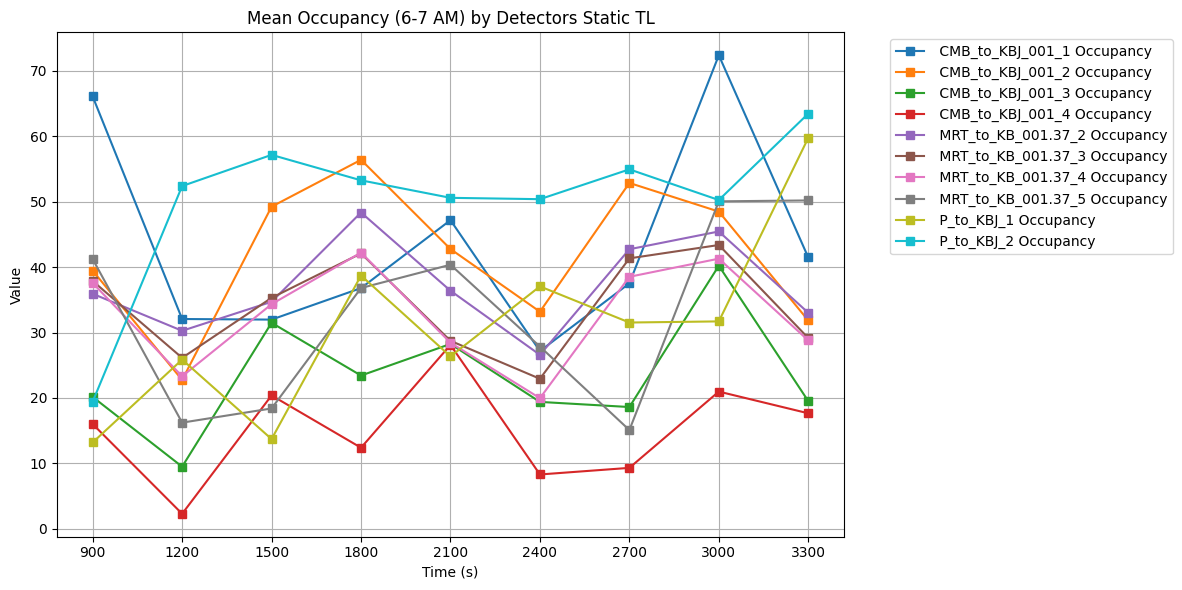

In [6]:
# Plot Mean Occupancy (6-7 AM) by Detectors Static TL
plt.figure(figsize=(12, 6))
for detector in df_grouped_static['interval_id'].unique():
    subset = df_grouped_static[df_grouped_static['interval_id'] == detector]
    ##plt.plot(subset['interval_begin'], subset[' interval_meanTimeLoss'], marker='o', label=f"{detector} Time Loss")
    plt.plot(subset['interval_begin'], subset['interval_meanOccupancy'], marker='s', label=f"{detector} Occupancy")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Mean Occupancy (6-7 AM) by Detectors Static TL")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(df_grouped_static['interval_begin'].unique())
plt.tight_layout()
plt.show()

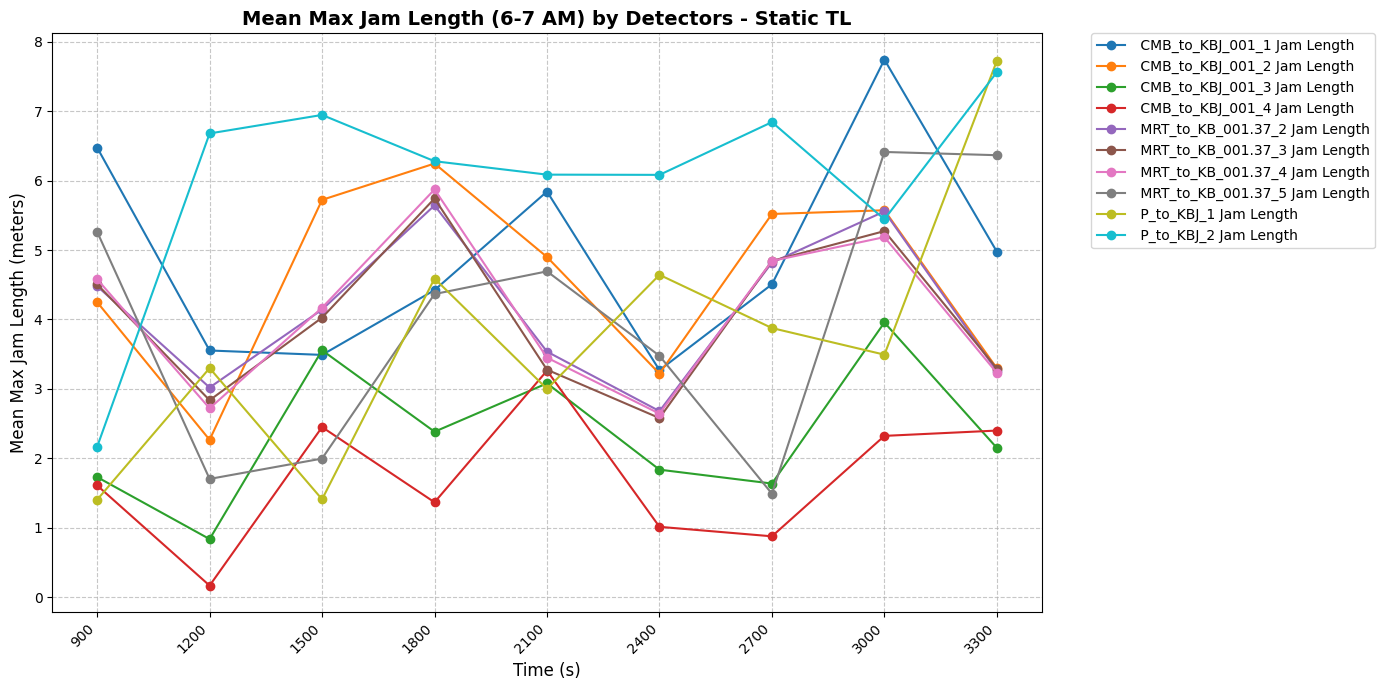

In [7]:
## Mean Max Jam Length (6-7 AM) by Detectors - Static TL

df_grouped_static = df_peak_static.groupby(['interval_id', 'interval_begin'])['interval_meanMaxJamLengthInMeters'].mean().reset_index()

# Create a new figure for the plot with a specified size.
plt.figure(figsize=(14, 7))

for detector in df_grouped_static['interval_id'].unique():
    subset = df_grouped_static[df_grouped_static['interval_id'] == detector]
    plt.plot(subset['interval_begin'], subset['interval_meanMaxJamLengthInMeters'],
             marker='o', linestyle='-', label=f"{detector} Jam Length")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Mean Max Jam Length (meters)", fontsize=12)
plt.title("Mean Max Jam Length (6-7 AM) by Detectors - Static TL", fontsize=14, fontweight='bold')
# Add a legend to identify each detector's line.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_grouped_static['interval_begin'].unique(), rotation=45, ha='right')
plt.tight_layout()

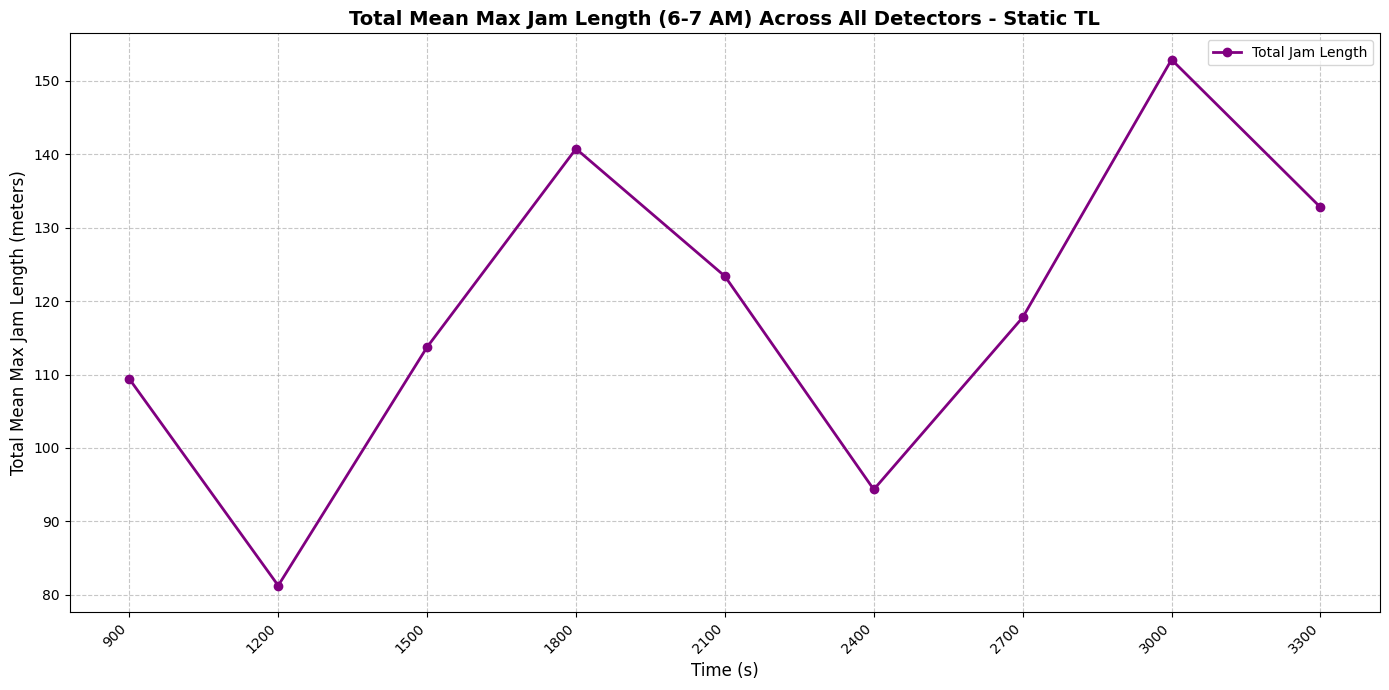

In [8]:
df_grouped_sum_static = df_peak_static.groupby('interval_begin')['interval_meanMaxJamLengthInMeters'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(df_grouped_sum_static['interval_begin'], df_grouped_sum_static['interval_meanMaxJamLengthInMeters'],
         marker='o', linestyle='-', color='purple', linewidth=2, label="Total Jam Length")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Total Mean Max Jam Length (meters)", fontsize=12)
plt.title("Total Mean Max Jam Length (6-7 AM) Across All Detectors - Static TL", fontsize=14, fontweight='bold')
plt.legend(loc='best') # 'best' will try to find the optimal location for the legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_grouped_sum_static['interval_begin'].unique(), rotation=45, ha='right')
plt.tight_layout()

Dynamic Traffic Lights

In [9]:
# Load the CSV data for dynamic TL
df_dynamic = pd.read_csv("additionals/dynamic_vehicle_data/processed_dynamic_vehicle_data_results/all_dynamic_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic.columns = df_dynamic.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_peak_dynamic = df_dynamic[(df_dynamic['interval_begin'] >= 900) & (df_dynamic['interval_end'] <= 3600)]

In [10]:
# Group by detector and time, average across seeds dynamic
df_grouped_dynamic = df_peak_dynamic.groupby(['interval_id', 'interval_begin'])[['interval_meanTimeLoss', 'interval_meanOccupancy']].mean().reset_index()

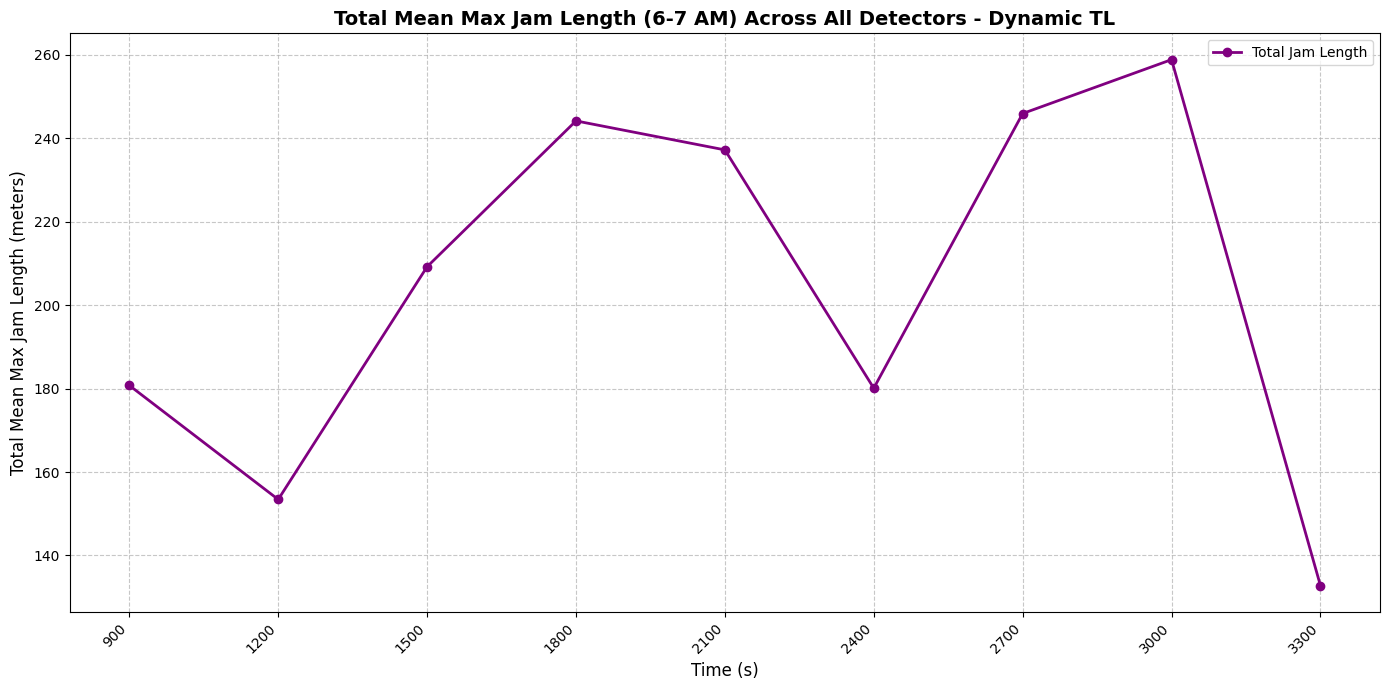

In [11]:
df_grouped_sum_dynamic = df_peak_dynamic.groupby('interval_begin')['interval_meanMaxJamLengthInMeters'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(df_grouped_sum_dynamic['interval_begin'], df_grouped_sum_dynamic['interval_meanMaxJamLengthInMeters'],
         marker='o', linestyle='-', color='purple', linewidth=2, label="Total Jam Length")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Total Mean Max Jam Length (meters)", fontsize=12)
plt.title("Total Mean Max Jam Length (6-7 AM) Across All Detectors - Dynamic TL", fontsize=14, fontweight='bold')
plt.legend(loc='best') # 'best' will try to find the optimal location for the legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_grouped_sum_dynamic['interval_begin'].unique(), rotation=45, ha='right')
plt.tight_layout()

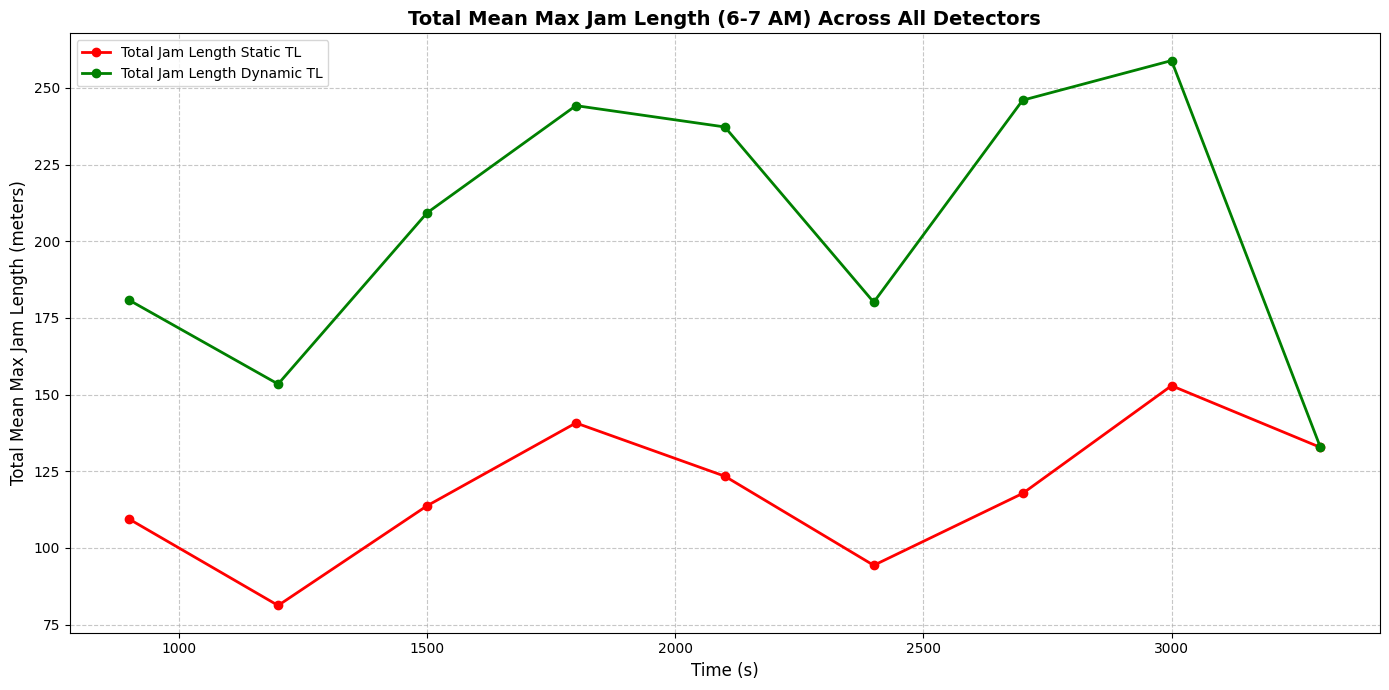

In [12]:
# static TL
plt.figure(figsize=(14, 7))

plt.plot(df_grouped_sum_static['interval_begin'], df_grouped_sum_static['interval_meanMaxJamLengthInMeters'],
         marker='o', linestyle='-', color='red', linewidth=2, label="Total Jam Length Static TL")

plt.plot(df_grouped_sum_static['interval_begin'], df_grouped_sum_dynamic['interval_meanMaxJamLengthInMeters'],
         marker='o', linestyle='-', color='green', linewidth=2, label="Total Jam Length Dynamic TL")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Total Mean Max Jam Length (meters)", fontsize=12)
plt.title("Total Mean Max Jam Length (6-7 AM) Across All Detectors", fontsize=14, fontweight='bold')
plt.legend(loc='best') # 'best' will try to find the optimal location for the legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

In [13]:
# Plot Mean Time Loss (6-7 AM) by Detectors Static TL
plt.figure(figsize=(12, 6))
for detector in df_grouped_static['interval_id'].unique():
    subset = df_grouped_static[df_grouped_static['interval_id'] == detector]
    plt.plot(subset['interval_begin'], subset['interval_meanTimeLoss'], marker='o', label=f"{detector} Time Loss")
    ##plt.plot(subset['interval_begin'], subset[' interval_meanOccupancy'], marker='s', label=f"{detector} Occupancy")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Mean Time Loss (6-7 AM) by Detectors Static TL")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(df_grouped_static['interval_begin'].unique())
plt.tight_layout()
plt.show()

KeyError: 'interval_meanTimeLoss'

<Figure size 1200x600 with 0 Axes>